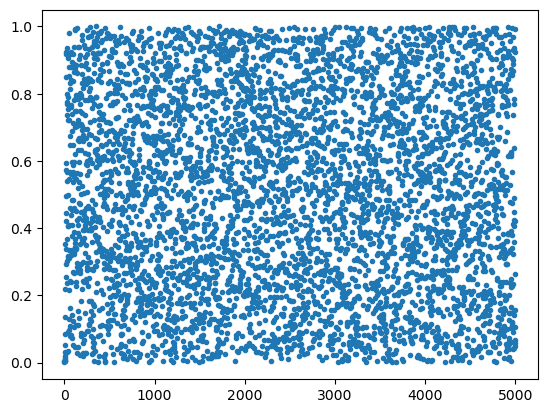

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#用斐波那契数列取模的方法生成伪随机数
def rand_add_mod(X0,X1,M,N):
    X = np.zeros(N)
    X[0] = X0
    X[1] = X1
    for i in range(2,N):
        X[i] = (X[i-1] + X[i-2]) % M
    return X/(M-1)

X = rand_add_mod(197,39,65535,5000)

plt.plot(X,'.')
plt.show()


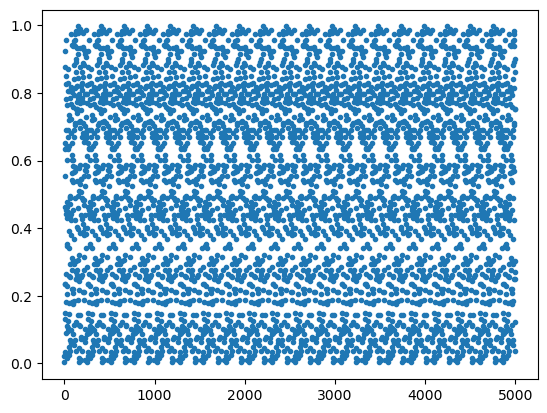

In [3]:
def rand_add_linear(X0,A,C,M,N):
    X = np.zeros(N)
    X[0] = X0
    for i in range(1,N):
        X[i] = (A*X[i-1] + C) % M
    return X/(M-1)

X = rand_add_linear(197,7,3,65535,5000)

plt.plot(X,'.')
plt.show()

遗传算法

Gen0:Best0.8367,f(x) = 1.7652
Gen1:Best0.8519,f(x) = 1.8504
Gen2:Best0.8519,f(x) = 1.8504
Gen3:Best0.8540,f(x) = 1.8474
Gen4:Best0.8540,f(x) = 1.8473
Gen5:Best0.8540,f(x) = 1.8474
Gen6:Best0.8540,f(x) = 1.8474
Gen7:Best0.8540,f(x) = 1.8474
Gen8:Best0.8540,f(x) = 1.8474
Gen9:Best0.8530,f(x) = 1.8492
Gen10:Best0.8535,f(x) = 1.8483
Gen11:Best0.8535,f(x) = 1.8483
Gen12:Best0.8524,f(x) = 1.8500
Gen13:Best0.8524,f(x) = 1.8500
Gen14:Best0.8555,f(x) = 1.8429
Gen15:Best0.8553,f(x) = 1.8434
Gen16:Best0.8553,f(x) = 1.8434
Gen17:Best0.8553,f(x) = 1.8434
Gen18:Best0.8553,f(x) = 1.8434
Gen19:Best0.8398,f(x) = 1.7974
Gen20:Best0.8398,f(x) = 1.7974
Gen21:Best0.8599,f(x) = 1.8189
Gen22:Best0.8598,f(x) = 1.8193
Gen23:Best0.8598,f(x) = 1.8193
Gen24:Best0.8598,f(x) = 1.8193
Gen25:Best0.8598,f(x) = 1.8193
Gen26:Best0.8598,f(x) = 1.8193
Gen27:Best0.8598,f(x) = 1.8193
Gen28:Best0.8597,f(x) = 1.8201
Gen29:Best0.8598,f(x) = 1.8193
Gen30:Best0.8461,f(x) = 1.8399
Gen31:Best0.8467,f(x) = 1.8421
Gen32:Best0.8467,f

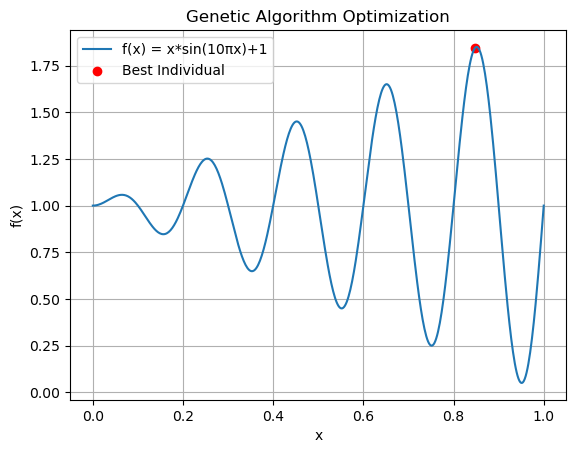

In [7]:
import numpy as np
import random 
import matplotlib.pyplot as plt

#目标函数
def fitness_function(x):
    return x*np.sin(10*np.pi*x)+1.0

#超参数
POP_SIZE = 50 #种群数量
DNA_SIZE = 16 #个体的二进制长度
CROSS_RATE = 0.8 #交叉概率
MUTATION_RATE = 0.003 #变异概率
N_GENERATIONS = 200 #迭代次数
X_BOUND = [0,1] #自变量范围
# 设置保留的精英数量
ELITE_SIZE = 1

#初始化种群
pop = np.random.randint(0,2,(POP_SIZE,DNA_SIZE))

def translate_DNA(pop):
    decimal = pop.dot(2**np.arange(DNA_SIZE)[::-1]) #二进制转十进制
    return X_BOUND[0] + (X_BOUND[1] - X_BOUND[0]) * decimal / (2**DNA_SIZE-1) #映射到区间

def get_fitness(pred): 
    return fitness_function(pred) #返回适应度

#自然选择
def select(pop,fitness):
    index = np.random.choice(np.arange(POP_SIZE),size=POP_SIZE,replace=True,p=fitness/fitness.sum()) #适应度越高被选中概率越大
    return pop[index]

#交叉
def crossover(parent,pop):
    if np.random.rand() < CROSS_RATE:
        i = np.random.randint(0,POP_SIZE) #随机选择一个个体
        crosspoint = np.random.randint(0,DNA_SIZE)
        parent[crosspoint:] = pop[i,crosspoint:]
    return parent

#变异
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 - child[point]
    return child

#迭代
for generation in range(N_GENERATIONS):
    x = translate_DNA(pop)
    fitness = get_fitness(x)
    best_index = np.argmax(fitness) #最优值
    print(f'Gen{generation}:Best{x[best_index]:.4f},f(x) = {fitness[best_index]:.4f}')

    #选择/交叉/变异
    pop = select(pop,fitness)
    pop_copy = pop.copy()
    for i in range(POP_SIZE):
        child = crossover(pop_copy[i],pop)
        child = mutate(child)
        pop[i] = child

    # 找出当前新种群中最差的 ELITE_SIZE 个个体（适应度最小的）
    worst_indices = np.argsort(fitness)[:ELITE_SIZE]  # 最差个体索引
    elite_indices = np.argsort(fitness)[-ELITE_SIZE:] # 最优个体索引

    # 将精英个体插入到最差个体的位置
    pop[worst_indices] = pop[elite_indices]

# 绘制目标函数和最优解
x_vals = np.linspace(X_BOUND[0], X_BOUND[1], 500)
y_vals = fitness_function(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x*sin(10πx)+1')
best_x = translate_DNA(pop)[best_index]
plt.scatter([best_x], [fitness_function(best_x)], c='red', label='Best Individual')

plt.title('Genetic Algorithm Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

